# SAKI Exercise 1

In [1]:
import pandas as pd
import string, re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from datetime import datetime
import sys
!{sys.executable} -m pip install schwifty
from schwifty import IBAN
from schwifty import BIC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#!{sys.executable} -m pip install mglearn
#import mglearn
!{sys.executable} -m pip install seaborn
import seaborn as sn
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Achim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Achim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Load transaction file from current working dir
df = pd.read_csv('Exercise1-TransactionClassification-DataSet.csv', error_bad_lines=False, delimiter=";").copy()

In [3]:
#check null values
df.isnull().sum()

Unnamed: 0                            0
Auftragskonto                        41
Buchungstag                           0
Valutadatum                           0
Buchungstext                          0
Verwendungszweck                      0
Beguenstigter/Zahlungspflichtiger     0
Kontonummer                           1
BLZ                                   1
Betrag                                0
Waehrung                              0
label                                 0
dtype: int64

In [4]:
#replace null values inside 'Kontonummer' and 'BLZ' with 0
df.Kontonummer.fillna(0, inplace = True)
df.BLZ.fillna(0, inplace = True)

In [5]:
df.isnull().sum()

Unnamed: 0                            0
Auftragskonto                        41
Buchungstag                           0
Valutadatum                           0
Buchungstext                          0
Verwendungszweck                      0
Beguenstigter/Zahlungspflichtiger     0
Kontonummer                           0
BLZ                                   0
Betrag                                0
Waehrung                              0
label                                 0
dtype: int64

In [6]:
#check if 'Betrag' is set correctly
df.Betrag.sum()

'2000.00-670.00-70.00-73.21-363200.00-19.99-28.85-300.00-50.002000.00-670.00200.00-25.99-19.99-73.21-10.00-300.00-28.85-70.00-250.002000.00-670.00200.00-25.99-19.99-73.21-300.002000.00-670.00-28.85-100.00200.00-300.002000.00-670.00-1000.00-10.00200.00-300.002000.00-670.00-28.85-50.00200.00-300.002000.00-4000.001792,73-5000-500-50-440,3-89,99-535-5-20-51,2-12,99-24,3-89,99-3,84-12,99-100-110-3260,04-158,9-100-412,161792,73-50-20-30-535-22,77-24,99-28,85-20-100-33,73-20-22,57-46-82,96-24-40-26,02100-67,8-18-1000-20-51,2-37-9,75-20-52,42-7,54-100-110-32-26,02-15,99-165,7-5,45-412,16-10,422986,24-50-26,3-37,19-7,99-6,73-10-12,97-19,95-24,99-32-140-35,99-10-25-46-52,5-113,4-40161,7-34-40-103,8-7,17-51,2-33-13,7-20,85-20-40,65-17,93-13,87-6,96-34,95-100-110-22,64-412,161792,73-17,94-30-89,95-39,95-24,9550-20-19,95-12,8-24,99-70-50-9,99-40-30-20275,98-20-5-19.99-28.85-50.002000.00-670.00200.00-25.99-19.99-73.21-10.00-300.00-28.85-70.00-250.002000.00-670.00200.00-25.99-19.99-73.21-300.002000.0

In [7]:
#convert 'Betrag' to float with '.' as spacer
df[df.Betrag.apply(lambda x: x.isnumeric())]
df.Betrag = [x.replace(',', '.') for x in df.Betrag]
df.Betrag = pd.to_numeric(df.Betrag,errors='ignore')
df.Betrag.sum()

825.8400000000001

In [8]:
def prepare_text(line):
    def remove_punctuation(line):
        translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
        line = line.translate(translator)
        return line
    
    def remove_numbers(line, chars):
        return re.sub('[%s]' % chars, '', line).lower()
    
    line = remove_numbers(line, string.digits)
    line = remove_punctuation(line)
    tokens = word_tokenize(line)
        
    stop_words = set(stopwords.words('german'))
    return (word for word in tokens if word.lower() not in stop_words and word.lower() != '')

In [9]:
count_vect = CountVectorizer(analyzer=prepare_text)
bow_transformer = count_vect.fit(df.Verwendungszweck)
feature_matrix_bow = bow_transformer.transform(df.Verwendungszweck)

In [10]:
feature_matrix_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
tfidfTransformer = TfidfTransformer()
feature_matrix_tfidf = tfidfTransformer.fit_transform(feature_matrix_bow)
feature_matrix_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65319207, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
bowDF = pd.DataFrame(feature_matrix_tfidf.toarray(), columns=count_vect.get_feature_names())
df = df.join(bowDF)
df.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,...,visanuernberg,visarathaus,visaschnieglin,visasenningerberg,vj,vk,winkl,www,zalando,überweisung
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,...,0.0,0.0,0.0,0.0,0.327438,0.0,0.0,0.0,0.0,0.0
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
#def prepare_date(date):
#    #print(date)
#    date = datetime.strptime(date, '%d.%m.%Y')
#    print(date)
#    return date.weekday()

df.Buchungstag = pd.to_datetime(df.Buchungstag, format='%d.%m.%Y')
df.Buchungstag = df.Buchungstag.dt.dayofweek
df.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,...,visanuernberg,visarathaus,visaschnieglin,visasenningerberg,vj,vk,winkl,www,zalando,überweisung
0,0,89990201.0,3,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,89990201.0,2,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,89990201.0,3,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,89990201.0,2,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,...,0.0,0.0,0.0,0.0,0.327438,0.0,0.0,0.0,0.0,0.0
4,4,89990201.0,0,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
len(df.Buchungstext.unique())

14

In [15]:
print("Amount of unique /'Buchungstext/' before: ", len(df.Buchungstext.unique()))
df.Buchungstext = pd.Categorical(df.Buchungstext)
df.Buchungstext = df.Buchungstext.cat.codes
print("Amount of unique /'Buchungstext/' after: ", len(df.Buchungstext.unique()))

Amount of unique /'Buchungstext/' before:  14
Amount of unique /'Buchungstext/' after:  14


In [16]:
df.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,...,visanuernberg,visarathaus,visaschnieglin,visasenningerberg,vj,vk,winkl,www,zalando,überweisung
0,0,89990201.0,3,28.07.2016,10,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,89990201.0,2,27.07.2016,11,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,89990201.0,3,21.07.2016,1,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,89990201.0,2,20.07.2016,9,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,...,0.0,0.0,0.0,0.0,0.327438,0.0,0.0,0.0,0.0,0.0
4,4,89990201.0,0,18.07.2016,13,Amazon,neue Playstation,9988776655,25125100,-363.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
#df['Beguenstigter/Zahlungspflichtiger'] = df['Beguenstigter/Zahlungspflichtiger'].apply(str)
print("Amount of unique /'Beguenstigter/Zahlungspflichtiger/' before: ", len(df['Beguenstigter/Zahlungspflichtiger'].unique()))
df['Beguenstigter/Zahlungspflichtiger'] = pd.Categorical(df['Beguenstigter/Zahlungspflichtiger'])
df['Beguenstigter/Zahlungspflichtiger'] = df['Beguenstigter/Zahlungspflichtiger'].cat.codes
print("Amount of unique /'Beguenstigter/Zahlungspflichtiger/' after: ",len(df['Beguenstigter/Zahlungspflichtiger'].unique()))

Amount of unique /'Beguenstigter/Zahlungspflichtiger/' before:  59
Amount of unique /'Beguenstigter/Zahlungspflichtiger/' after:  59


In [18]:
def prepare_account_nmb(nmb):
    r = re.compile('[a-zA-Z]{2}[0-9]{2}[a-zA-Z0-9]{4}[0-9]{7}([a-zA-Z0-9]?){0,16}')
    account_nmb = ''
    if nmb is 0:
        account_nmb = '0'
    elif r.match(nmb) is not None:
        account_nmb = nmb[-10:]
    else:
        account_nmb = nmb
    
    return account_nmb

In [19]:
def prepare_blz_nmb(nmb):
    r = re.compile('([a-zA-Z]{4})([a-zA-Z]{2})(([2-9a-zA-Z]{1})([0-9a-np-zA-NP-Z]{1}))((([0-9a-wy-zA-WY-Z]{1})([0-9a-zA-Z]{2}))|([xX]{3})|)')
    blz_nmb = ''
    if nmb is 0:
        blz_nmb = '0'
    elif r.match(nmb) is not None:
        bic = BIC(nmb)
        blz_nmb = bic.country_bank_code
    else:
        blz_nmb = nmb
    
    return blz_nmb

In [20]:
df.Kontonummer = df.Kontonummer.apply(prepare_account_nmb)
print("Amount of unique /'Kontonummer/' before: ", len(df.Kontonummer.unique()))
df.Kontonummer = pd.Categorical(df.Kontonummer)
df.Kontonummer = df.Kontonummer.cat.codes
print("Amount of unique /'Kontonummer/' after: ", len(df.Kontonummer.unique()))

Amount of unique /'Kontonummer/' before:  52
Amount of unique /'Kontonummer/' after:  52


In [21]:
df.BLZ = df.BLZ.apply(prepare_blz_nmb)
print("Amount of unique /'BLZ/' before: ", len(df.BLZ.unique()))
df.BLZ = pd.Categorical(df.BLZ)
df.BLZ = df.BLZ.cat.codes
print("Amount of unique /'BLZ/' after: ", len(df.BLZ.unique()))
df.head()

Amount of unique /'BLZ/' before:  25
Amount of unique /'BLZ/' after:  25


,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,...,visanuernberg,visarathaus,visaschnieglin,visasenningerberg,vj,vk,winkl,www,zalando,überweisung
0,0,89990201.0,3,28.07.2016,10,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,4,44,6,2000.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,89990201.0,2,27.07.2016,11,Byladem1Sbt De12773501123456789889 Miete Beuth...,30,45,7,-670.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,89990201.0,3,21.07.2016,1,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",15,51,6,-70.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,89990201.0,2,20.07.2016,9,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,39,48,6,-73.21,...,0.0,0.0,0.0,0.0,0.327438,0.0,0.0,0.0,0.0,0.0
4,4,89990201.0,0,18.07.2016,13,Amazon,58,50,5,-363.00,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
print("Amount of unique labels before: ", len(df.label.unique()))
df.label = pd.Categorical(df.label)
df['LabelCodes'] = df.label.cat.codes
print("Amount of unique labels after: ", len(df.LabelCodes.unique()))

Amount of unique labels before:  6
Amount of unique labels after:  6


In [23]:
y = df.LabelCodes
y_names = df.label.unique()
df.drop([df.columns[0], 'Auftragskonto', 'Verwendungszweck', 'Valutadatum', 'Waehrung', 'label', 'LabelCodes'], axis=1, inplace=True)
df.shape
df.head()

,Buchungstag,Buchungstext,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,abonnement,abschlag,abschluss,adorsys,...,visanuernberg,visarathaus,visaschnieglin,visasenningerberg,vj,vk,winkl,www,zalando,überweisung
0,3,10,4,44,6,2000.00,0.0,0.0,0.0,0.307334,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2,11,30,45,7,-670.00,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,3,1,15,51,6,-70.00,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2,9,39,48,6,-73.21,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.327438,0.0,0.0,0.0,0.0,0.0
4,0,13,58,50,5,-363.00,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [25]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9365079365079365


In [27]:
expected = y_test
predicted = y_pred
confusion_matrix_result = confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[11  0  0  0  1  0]
 [ 0  4  0  0  0  0]
 [ 0  0 19  0  1  0]
 [ 0  0  0  8  0  0]
 [ 1  0  0  0  6  0]
 [ 0  0  1  0  0 11]]


In [28]:
import numpy as np
FP = confusion_matrix_result.sum(axis=0) - np.diag(confusion_matrix_result)  
FN = confusion_matrix_result.sum(axis=1) - np.diag(confusion_matrix_result)
TP = np.diag(confusion_matrix_result)
TN = confusion_matrix_result.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(TP)
print(FN)
print(FP)
print(TPR)

[11  4 19  8  6 11]
[1 0 1 0 1 1]
[1 0 1 0 2 0]
[0.91666667 1.         0.95       1.         0.85714286 0.91666667]


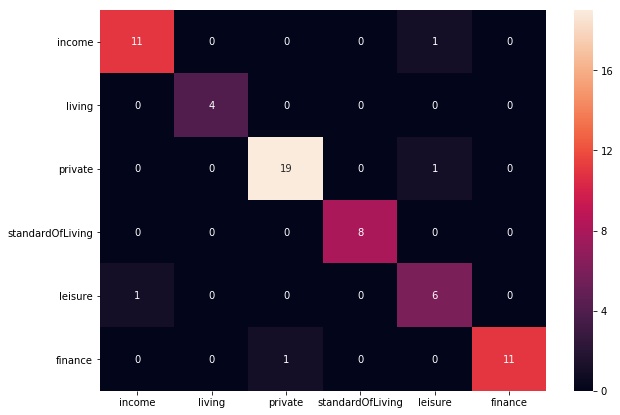

In [29]:
df_cm = pd.DataFrame(confusion_matrix_result, index = [i for i in y_names],
                  columns = [i for i in y_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [30]:
print(classification_report(y_test, predicted, target_names=y_names))

                  precision    recall  f1-score   support

          income       0.92      0.92      0.92        12
          living       1.00      1.00      1.00         4
         private       0.95      0.95      0.95        20
standardOfLiving       1.00      1.00      1.00         8
         leisure       0.75      0.86      0.80         7
         finance       1.00      0.92      0.96        12

       micro avg       0.94      0.94      0.94        63
       macro avg       0.94      0.94      0.94        63
    weighted avg       0.94      0.94      0.94        63

